In [1]:
import json
import matplotlib.pyplot as plt
import os
import sys
import time
import importlib
from collections import deque
from IPython.display import display, clear_output

# Add current directory to path to import config if needed
sys.path.append(os.getcwd())
import config
importlib.reload(config) # Reload config to ensure latest paths are used

print(f"Config loaded.")
print(f"Pretrain Log: {config.PRETRAIN_LOG_FILE}")
print(f"Train Log: {config.LOG_FILE}")

Config loaded.
Pretrain Log: d:\projects\github\Hearts\new_method\output\pretrain_log.json
Train Log: d:\projects\github\Hearts\new_method\output\training_log.json


In [2]:
def live_dashboard(pretrain_log, train_log, refresh_rate=2):
    """
    Simultaneously visualize Pretraining and Training progress.
    """
    print(f"Monitoring:\n1. {pretrain_log}\n2. {train_log}")
    
    fig = plt.figure(figsize=(18, 10))
    
    try:
        while True:
            # --- Load Pretrain Data ---
            pre_data = {}
            if os.path.exists(pretrain_log):
                try:
                    with open(pretrain_log, 'r') as f:
                        content = f.read()
                        if content: pre_data = json.loads(content)
                except: pass
            
            # --- Load Train Data ---
            train_data = {}
            if os.path.exists(train_log):
                try:
                    with open(train_log, 'r') as f:
                        content = f.read()
                        if content: train_data = json.loads(content)
                except: pass
                
            # Clear Plot
            plt.clf()
            
            # Helper to check if data is valid
            has_pre = pre_data and pre_data.get('episodes') and len(pre_data['episodes']) > 0
            has_train = train_data and train_data.get('episodes') and len(train_data['episodes']) > 0

            # --- Plot 1: Pretrain Loss ---
            ax1 = plt.subplot(2, 2, 1)
            if has_pre:
                ep = pre_data['episodes']
                loss = pre_data.get('loss', [])
                if loss:
                    plt.plot(ep, loss, color='red', linewidth=2, label='Loss')
                    plt.title(f'Pretraining Loss (Ep {ep[-1]})')
                    plt.xlabel('Episodes')
                    plt.ylabel('Loss')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
            else:
                plt.text(0.5, 0.5, 'Waiting for Pretrain Data...', ha='center', fontsize=12, color='gray')
                plt.axis('off')
                
            # --- Plot 2: Pretrain Accuracy ---
            ax2 = plt.subplot(2, 2, 2)
            if has_pre:
                ep = pre_data['episodes']
                p_acc = pre_data.get('policy_acc', [])
                q_acc = pre_data.get('qs_acc', [])
                if p_acc: plt.plot(ep, p_acc, color='blue', label='Policy Acc')
                if q_acc: plt.plot(ep, q_acc, color='green', label='QS Pred Acc')
                plt.title('Pretraining Accuracy')
                plt.xlabel('Episodes')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid(True, alpha=0.3)
            else:
                plt.text(0.5, 0.5, 'Waiting for Pretrain Data...', ha='center', fontsize=12, color='gray')
                plt.axis('off')

            # --- Plot 3: Training Score ---
            ax3 = plt.subplot(2, 2, 3)
            if has_train:
                ep = train_data['episodes']
                scores = train_data.get('scores', [])
                if scores:
                    plt.plot(ep, scores, alpha=0.3, color='blue', label='Raw Score')
                    if len(scores) > 50:
                        window = 50
                        avg = [sum(scores[i:i+window])/window for i in range(len(scores)-window+1)]
                        plt.plot(ep[window-1:], avg, color='blue', linewidth=2, label='Avg Score')
                    plt.title(f'Training Score (Ep {ep[-1]})')
                    plt.xlabel('Episodes')
                    plt.ylabel('Score (Lower is Better)')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
            else:
                plt.text(0.5, 0.5, 'Waiting for Training Data...', ha='center', fontsize=12, color='gray')
                plt.axis('off')

            # --- Plot 4: Training Reward ---
            ax4 = plt.subplot(2, 2, 4)
            if has_train:
                ep = train_data['episodes']
                rewards = train_data.get('rewards', [])
                if rewards:
                    plt.plot(ep, rewards, alpha=0.3, color='green', label='Raw Reward')
                    if len(rewards) > 50:
                        window = 50
                        avg = [sum(rewards[i:i+window])/window for i in range(len(rewards)-window+1)]
                        plt.plot(ep[window-1:], avg, color='green', linewidth=2, label='Avg Reward')
                    plt.title('Training Reward')
                    plt.xlabel('Episodes')
                    plt.ylabel('Reward')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
            else:
                plt.text(0.5, 0.5, 'Waiting for Training Data...', ha='center', fontsize=12, color='gray')
                plt.axis('off')
            
            plt.tight_layout()
            display(fig)
            clear_output(wait=True)
            time.sleep(refresh_rate)
            
    except KeyboardInterrupt:
        print("Visualization stopped.")

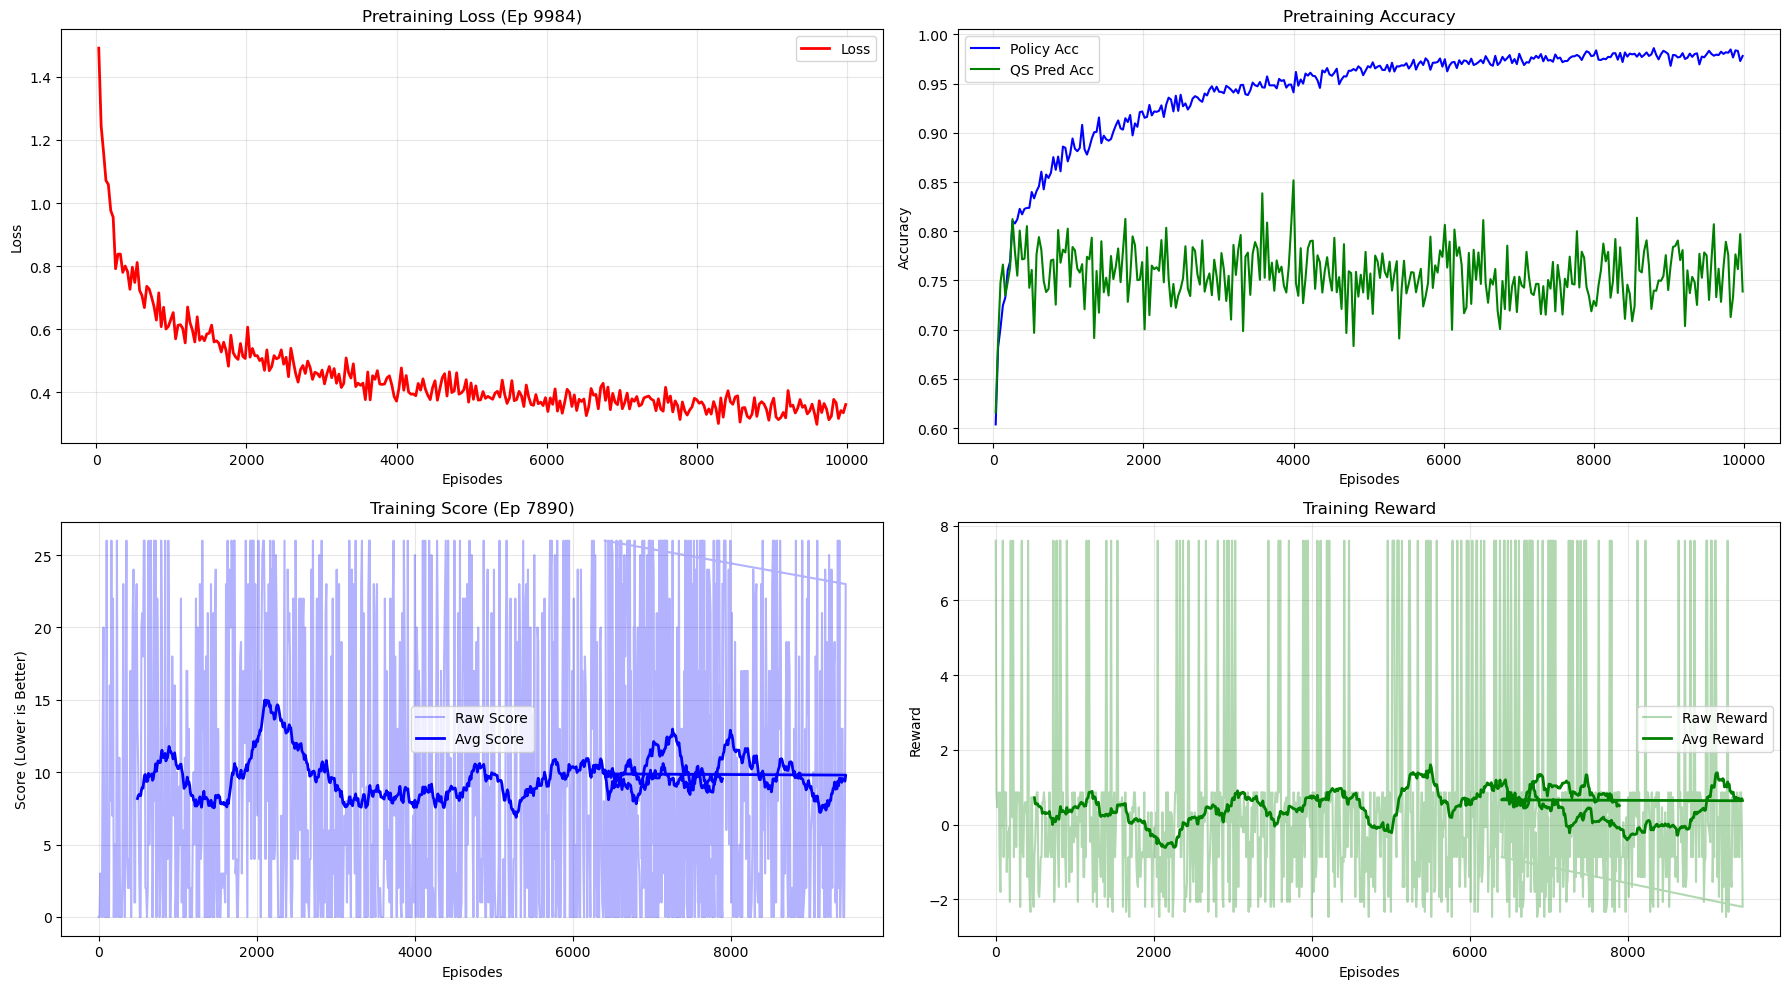

In [ ]:
# Run this cell to watch BOTH Pretraining and Training Progress
live_dashboard(config.PRETRAIN_LOG_FILE, config.LOG_FILE)

In [ ]:
def save_current_plot(pretrain_log, train_log, output_folder='res'):
    """
    Generates and saves the current training progress plot to a file in the 'res' folder.
    """
    # Ensure output directory exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Created folder: {output_folder}")
    
    # Generate timestamp for unique filename
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    filename = f"training_summary_{timestamp}.png"
    filepath = os.path.join(output_folder, filename)

    # --- Load Data ---
    pre_data = {}
    if os.path.exists(pretrain_log):
        try:
            with open(pretrain_log, 'r') as f:
                content = f.read()
                if content: pre_data = json.loads(content)
        except: pass
    
    train_data = {}
    if os.path.exists(train_log):
        try:
            with open(train_log, 'r') as f:
                content = f.read()
                if content: train_data = json.loads(content)
        except: pass

    # Setup Figure
    fig = plt.figure(figsize=(18, 10))
    
    has_pre = pre_data and pre_data.get('episodes') and len(pre_data['episodes']) > 0
    has_train = train_data and train_data.get('episodes') and len(train_data['episodes']) > 0

    # --- Plot 1: Pretrain Loss ---
    plt.subplot(2, 2, 1)
    if has_pre:
        ep = pre_data['episodes']
        loss = pre_data.get('loss', [])
        if loss:
            plt.plot(ep, loss, color='red', linewidth=2, label='Loss')
            plt.title(f'Pretraining Loss (Ep {ep[-1]})')
            plt.xlabel('Episodes')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Pretrain Data', ha='center', fontsize=12, color='gray')
        plt.axis('off')
        
    # --- Plot 2: Pretrain Accuracy ---
    plt.subplot(2, 2, 2)
    if has_pre:
        ep = pre_data['episodes']
        p_acc = pre_data.get('policy_acc', [])
        q_acc = pre_data.get('qs_acc', [])
        if p_acc: plt.plot(ep, p_acc, color='blue', label='Policy Acc')
        if q_acc: plt.plot(ep, q_acc, color='green', label='QS Pred Acc')
        plt.title('Pretraining Accuracy')
        plt.xlabel('Episodes')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Pretrain Data', ha='center', fontsize=12, color='gray')
        plt.axis('off')

    # --- Plot 3: Training Score ---
    plt.subplot(2, 2, 3)
    if has_train:
        ep = train_data['episodes']
        scores = train_data.get('scores', [])
        if scores:
            plt.plot(ep, scores, alpha=0.3, color='blue', label='Raw Score')
            if len(scores) > 50:
                window = 50
                avg = [sum(scores[i:i+window])/window for i in range(len(scores)-window+1)]
                plt.plot(ep[window-1:], avg, color='blue', linewidth=2, label='Avg Score')
            plt.title(f'Training Score (Ep {ep[-1]})')
            plt.xlabel('Episodes')
            plt.ylabel('Score (Lower is Better)')
            plt.legend()
            plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Training Data', ha='center', fontsize=12, color='gray')
        plt.axis('off')

    # --- Plot 4: Training Reward ---
    plt.subplot(2, 2, 4)
    if has_train:
        ep = train_data['episodes']
        rewards = train_data.get('rewards', [])
        if rewards:
            plt.plot(ep, rewards, alpha=0.3, color='green', label='Raw Reward')
            if len(rewards) > 50:
                window = 50
                avg = [sum(rewards[i:i+window])/window for i in range(len(rewards)-window+1)]
                plt.plot(ep[window-1:], avg, color='green', linewidth=2, label='Avg Reward')
            plt.title('Training Reward')
            plt.xlabel('Episodes')
            plt.ylabel('Reward')
            plt.legend()
            plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No Training Data', ha='center', fontsize=12, color='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
    # Save to file
    plt.savefig(filepath)
    print(f"Saved plot to: {filepath}")
    
    # Show inline
    plt.show()
    plt.close()

# Run the save function
save_current_plot(config.PRETRAIN_LOG_FILE, config.LOG_FILE)